## Library

In [1]:
import pandas as pd
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

## Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

Data and journals can be accessed here: [Download](https://drive.google.com/drive/folders/1eiHPSlf3rhl7J4-2HlRJOTbRWsUDbAuI?usp=sharing)

### Extract Data

In [3]:
# !unzip /content/drive/MyDrive/Dataset/Student Performance/student+performance.zip -d /content/drive/MyDrive/Dataset/Student Performance/

### Check Data

In [4]:
base_dir = '/content/drive/MyDrive/Dataset/Student Performance/'
data_desc = base_dir+'student.txt'
data_mat = base_dir+'student-mat.csv'
# data_por = base_dir+'student-por.csv'

Explanation of features in the data

In [5]:
with open(data_desc, 'r') as f:
  file_content = f.read()
print(file_content)

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

Sample data

In [6]:
data = pd.read_csv(data_mat, delimiter=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


## Exploratory Data Analysis

### Feature and Shape

Detail features of the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Shapes of the data

In [9]:
print("Jumlah data:",data.shape[0])
print("Jumlah kolom:",data.shape[1])

Jumlah data: 395
Jumlah kolom: 33


Detail values of the data

In [10]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Data null

In [11]:
data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


### Encoding Categorical Data

In [12]:
object_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for i in object_columns:
  data[i] = label_encoder.fit_transform(data[i])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [14]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


### Distribution and Correlation

Distribution of the data

In [15]:
for column in data.columns:
    print(f"Distribusi pada kolom '{column}':")
    print(data[column].value_counts())
    print("\n")

Distribusi pada kolom 'school':
school
0    349
1     46
Name: count, dtype: int64


Distribusi pada kolom 'sex':
sex
0    208
1    187
Name: count, dtype: int64


Distribusi pada kolom 'age':
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64


Distribusi pada kolom 'address':
address
1    307
0     88
Name: count, dtype: int64


Distribusi pada kolom 'famsize':
famsize
0    281
1    114
Name: count, dtype: int64


Distribusi pada kolom 'Pstatus':
Pstatus
1    354
0     41
Name: count, dtype: int64


Distribusi pada kolom 'Medu':
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64


Distribusi pada kolom 'Fedu':
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64


Distribusi pada kolom 'Mjob':
Mjob
2    141
3    103
0     59
4     58
1     34
Name: count, dtype: int64


Distribusi pada kolom 'Fjob':
Fjob
2    217
3    111
4     29
0     20
1     18
Name: count, dtype: int64


Di

Distribution of the target (dependent data)

<Axes: xlabel='G3', ylabel='Count'>

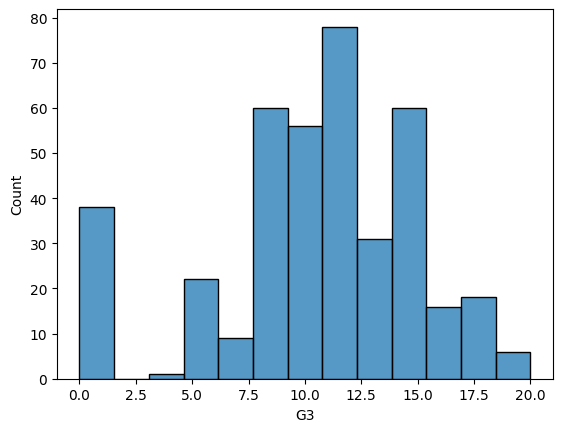

In [16]:
sns.histplot(data['G3'])

<Axes: xlabel='G3'>

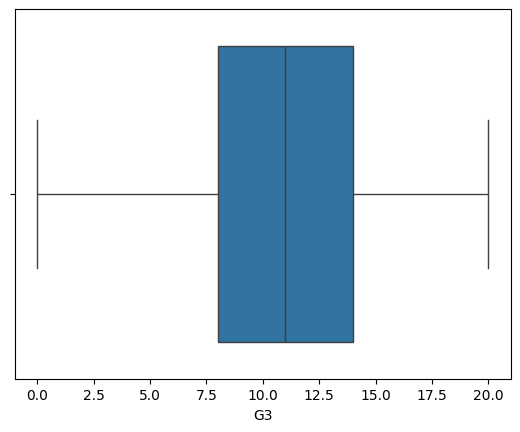

In [17]:
sns.boxplot(x=data['G3'])

<Axes: xlabel='G3', ylabel='Density'>

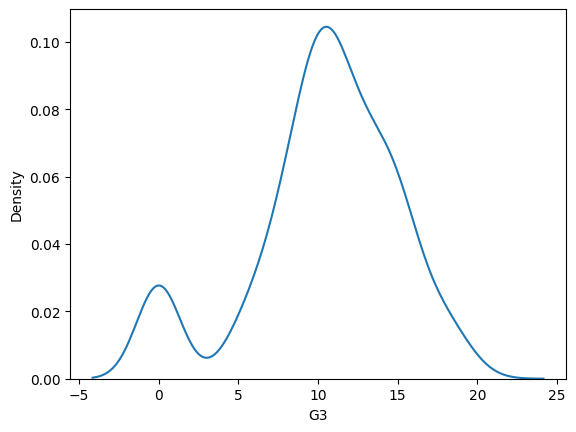

In [18]:
sns.kdeplot(data['G3'])

In [19]:
data['G3'].skew()

-0.7326723530443435

Correlation of the data

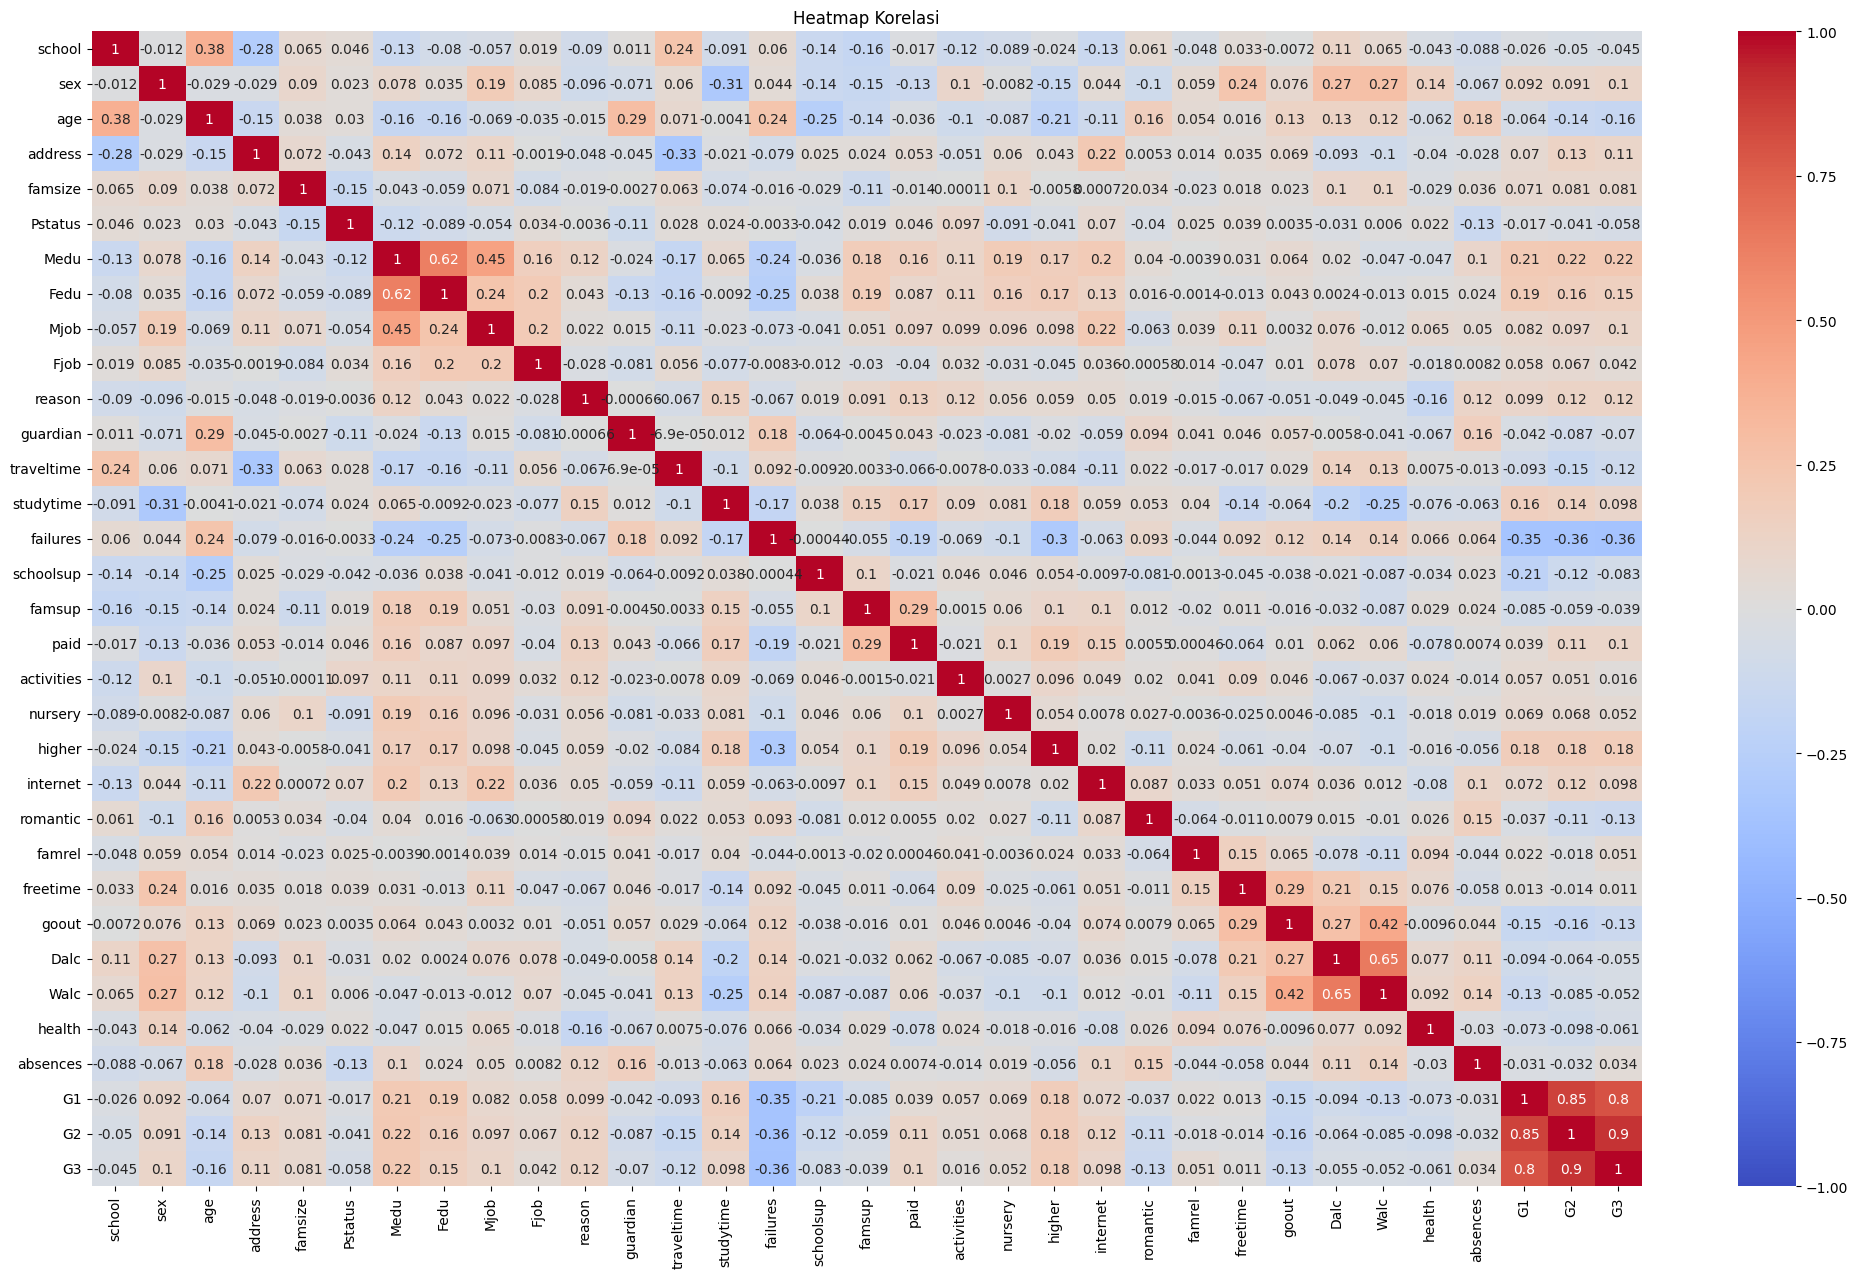

In [20]:
correlation_matrix = data.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Heatmap Korelasi')
plt.show()

## Preprocessing

### Convert Target (G3) to Categorical

G3 into 4 categories

In [21]:
data.loc[(data.G3 >= 14) & (data.G3 <= 20), 'final_grade'] = 'tinggi'
data.loc[(data.G3 >= 7) & (data.G3 <= 13), 'final_grade'] = 'sedang'
data.loc[(data.G3 >= 0) & (data.G3 <= 6), 'final_grade'] = 'rendah'
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,rendah
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,rendah
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,sedang
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,tinggi
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,sedang


Encoding

In [22]:
sch_map = {'rendah':0, 'sedang':1, 'tinggi':2}
data['final_grade'] = data['final_grade'].map(sch_map)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,2
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,1


Distribution of the data

<Axes: xlabel='final_grade', ylabel='count'>

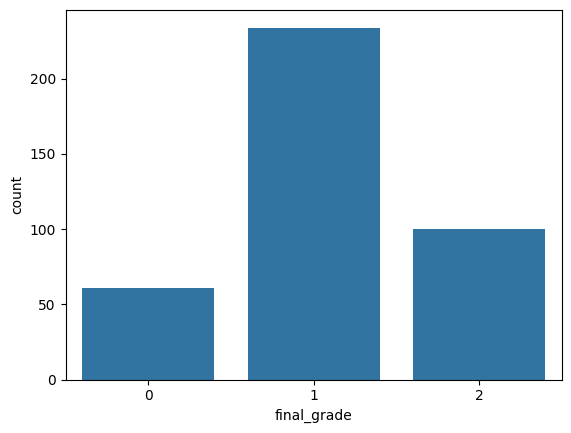

In [23]:
sns.countplot(x=data['final_grade'])

In [24]:
data['final_grade'].value_counts()

,count
final_grade,
1,234
2,100
0,61


### Standardization

Drop columns G1, G2, G3

In [25]:
scaler = StandardScaler()

target = data['final_grade']

scaler.fit(X = data.drop(columns=['G1', 'G2', 'G3', 'final_grade'], axis = 1))
data_std = scaler.transform(X = data.drop(columns=['G1', 'G2', 'G3', 'final_grade'], axis = 1))

data_std = pd.DataFrame(data_std, columns=data.columns[:-4])
data_std.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,...,0.23094,-2.232677,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,0.23094,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,0.23094,0.447893,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,0.23094,0.447893,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,...,0.23094,-2.232677,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796


### Split Data

Split into 80% Training and 20% Testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_std, target, test_size = 0.2, random_state = 42)

In [27]:
print("Shape Data Train:", X_train.shape)
print("Shape Data Test:", X_test.shape)

Shape Data Train: (316, 30)
Shape Data Test: (79, 30)


## Handle Imbalance Data

### ADASYN

In [28]:
print("Sebelum ADASYN:", Counter(y_train))

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print("Setelah ADASYN:", Counter(y_train_adasyn))

Sebelum ADASYN: Counter({1: 196, 2: 74, 0: 46})
Setelah ADASYN: Counter({1: 196, 0: 190, 2: 184})


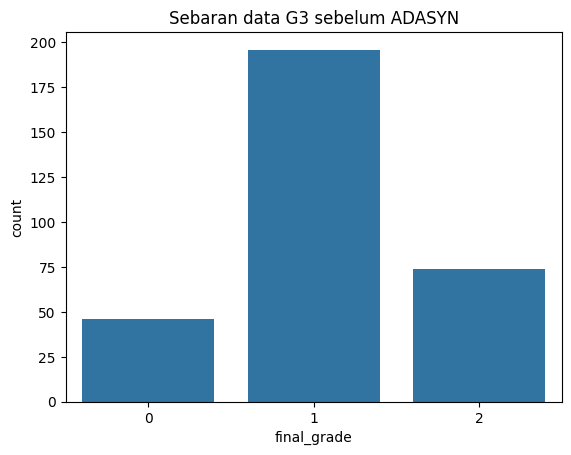

In [29]:
sns.countplot(x=y_train)
plt.title('Sebaran data G3 sebelum ADASYN')
print("")

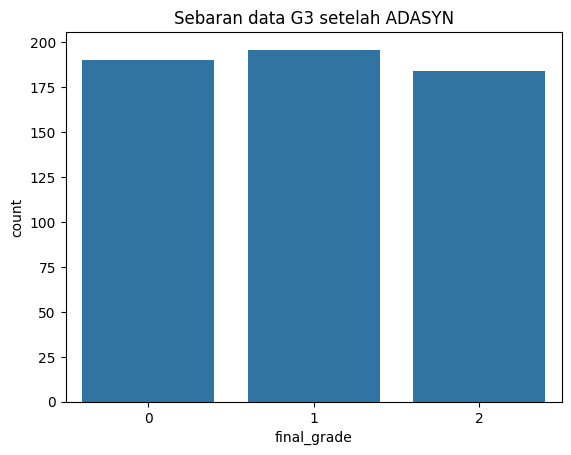

In [30]:
sns.countplot(x=y_train_adasyn)
plt.title('Sebaran data G3 setelah ADASYN')
print("")

## Feature Selection

### Embbeded - Tree Importance

Training using Decision Tree

In [38]:
tree = DecisionTreeRegressor(random_state=42)

tree.fit(X_train, y_train)

feature_importances = tree.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head()

,Feature,Importance
29,absences,0.165876
14,failures,0.084291
28,health,0.079829
13,studytime,0.057427
25,goout,0.051975


Ranking of feature importance

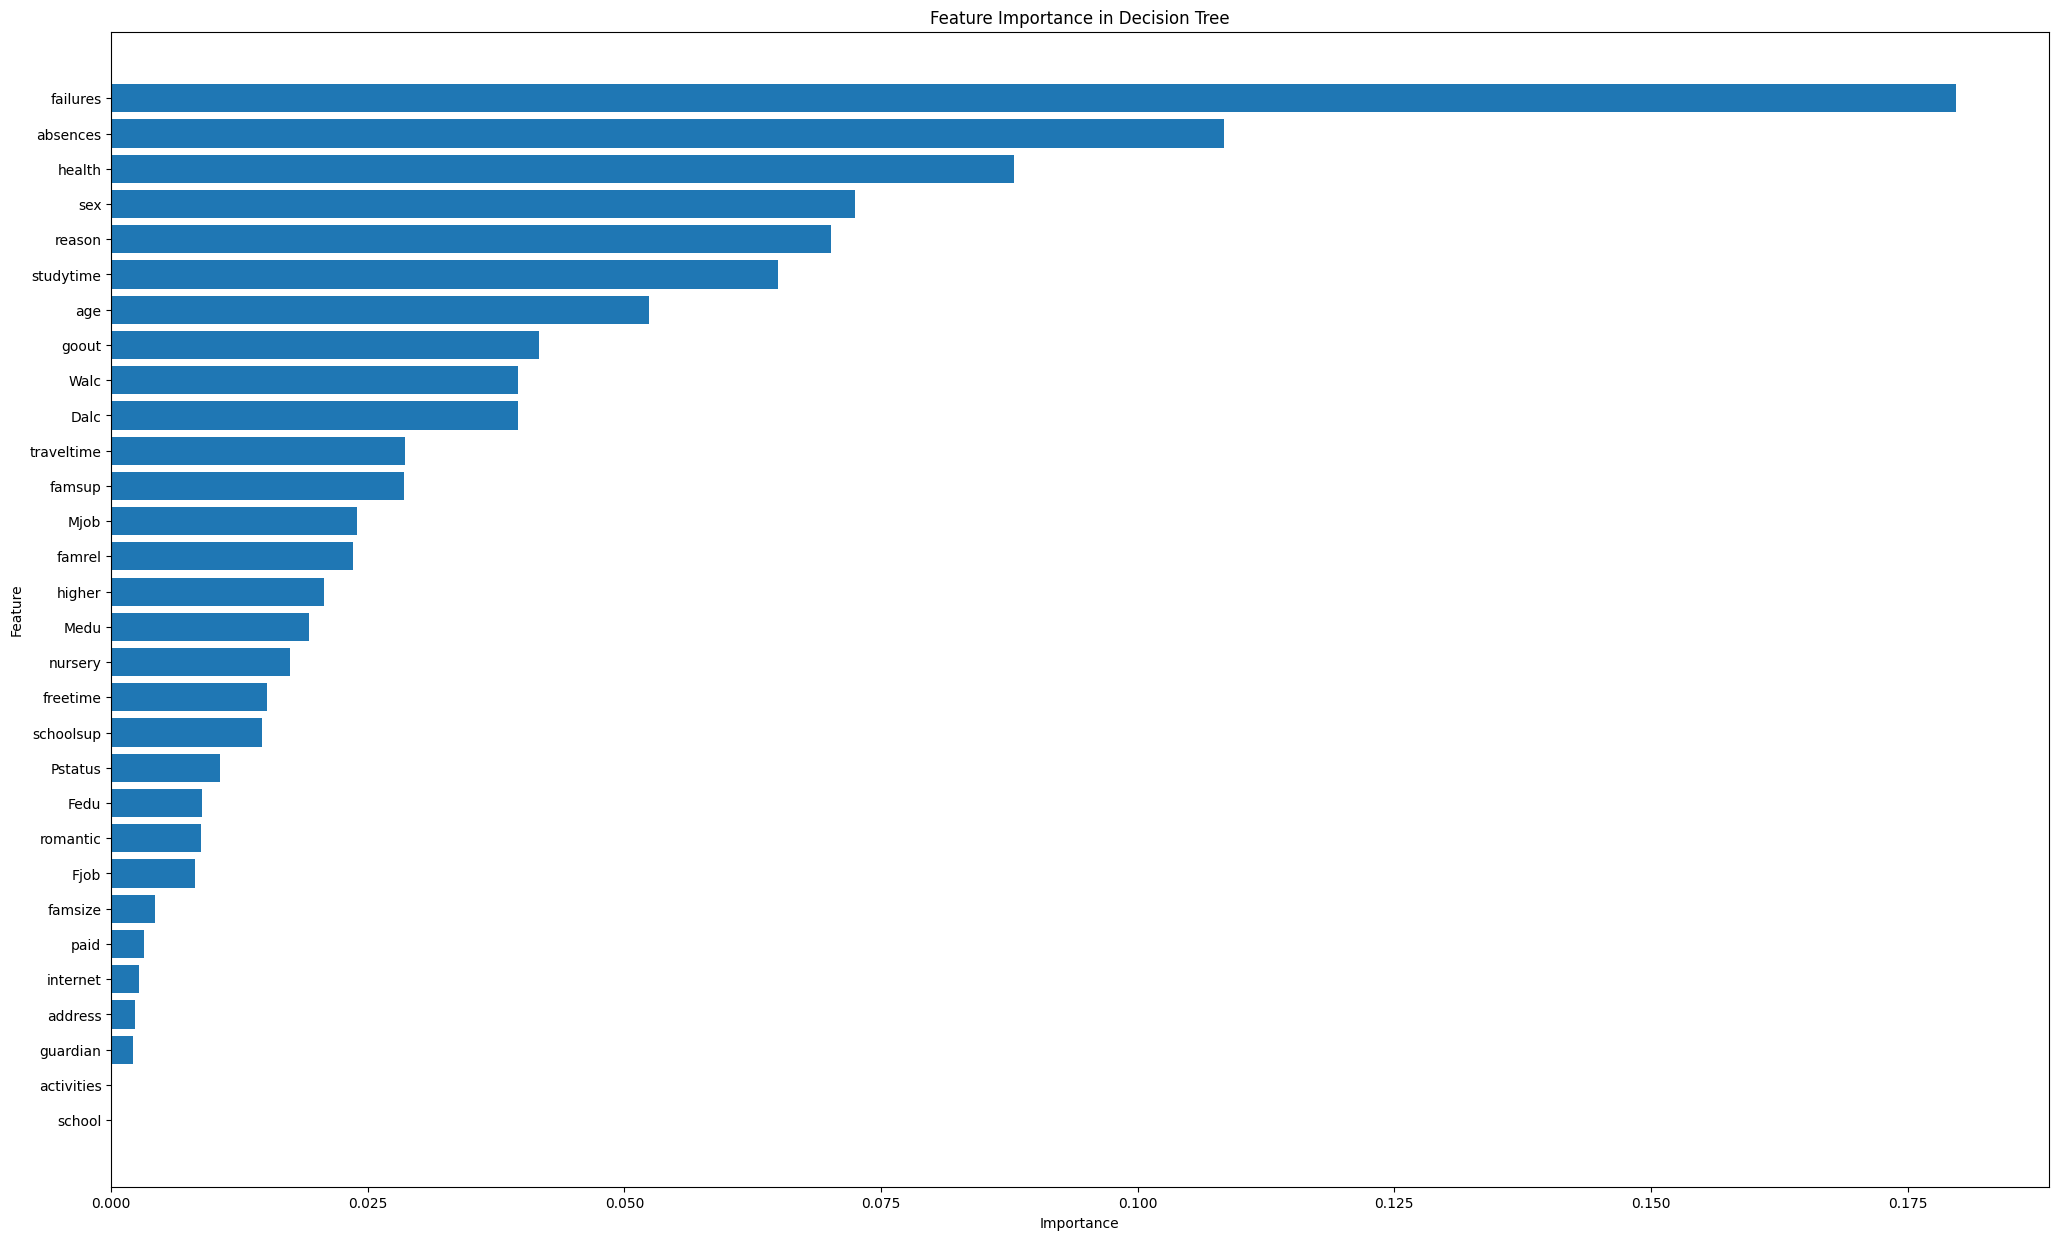

In [32]:
plt.figure(figsize=(25, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

## Modelling

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [34]:
print(X_train_adasyn)

      school       sex       age   address   famsize   Pstatus      Medu  \
0   -0.36305  1.054656 -0.546287  0.535392 -0.636941  0.340322  0.229234   
1   -0.36305  1.054656 -0.546287  0.535392 -0.636941  0.340322 -0.685387   
2   -0.36305 -0.948176 -0.546287  0.535392 -0.636941  0.340322 -1.600009   
3   -0.36305 -0.948176 -0.546287  0.535392 -0.636941  0.340322  1.143856   
4   -0.36305  1.054656 -0.546287 -1.867789 -0.636941  0.340322 -0.685387   
..       ...       ...       ...       ...       ...       ...       ...   
565  0.97288 -0.948176  0.574631  0.535392  1.570004  0.340322 -1.077327   
566 -0.36305 -0.429390 -1.330954  0.535392 -0.636941  0.340322  1.143856   
567 -0.36305  1.054656 -0.728961  0.535392 -0.636941  0.340322 -0.259530   
568 -0.36305 -0.948176 -0.407236  0.535392 -0.636941  0.340322  1.143856   
569 -0.36305  1.054656 -1.330954  0.535392  1.005493  0.340322  1.143856   

         Fedu      Mjob      Fjob  ...   higher  internet  romantic    famrel  \
0    0

In [35]:
print(type(X_train_adasyn))

<class 'pandas.core.frame.DataFrame'>


In [36]:
X_train_adasyn.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,-0.36305,1.054656,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,0.677354,-0.325831,...,0.23094,0.447893,1.411533,0.062194,-1.238419,-0.097908,-0.540699,-0.226345,-0.399289,-0.464016
1,-0.36305,1.054656,-0.546287,0.535392,-0.636941,0.340322,-0.685387,0.440257,-0.138362,-0.325831,...,0.23094,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.714236
2,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,-1.600009,0.440257,-1.769793,0.833659,...,0.23094,0.447893,1.411533,0.062194,-0.236010,1.700867,-0.540699,-1.003789,-0.399289,-0.714236
3,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,1.143856,0.440257,1.493069,-1.485321,...,0.23094,0.447893,-0.708450,-1.054472,0.766399,0.801479,0.583385,1.328545,0.320890,-0.464016
4,-0.36305,1.054656,-0.546287,-1.867789,-0.636941,0.340322,-0.685387,-1.399970,-0.138362,-0.325831,...,0.23094,-2.232677,-0.708450,-1.054472,-0.236010,-0.997295,-0.540699,0.551100,-0.399289,-0.714236


### Decision Tree

In [37]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_adasyn, y_train_adasyn)

y_pred = clf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title('Visualisasi Decision Tree')
plt.show()

Akurasi: 0.5443037974683544
Confusion Matrix:
[[ 4  9  2]
 [ 2 27  9]
 [ 4 10 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.27      0.32        15
           1       0.59      0.71      0.64        38
           2       0.52      0.46      0.49        26

    accuracy                           0.54        79
   macro avg       0.50      0.48      0.48        79
weighted avg       0.53      0.54      0.53        79



AttributeError: 'DataFrame' object has no attribute 'feature_names'

<Figure size 1200x800 with 0 Axes>

## Analysis

### Decision Tree

In [ ]:
data = pd.read_csv(data_mat, delimiter=';')
data.head()

In [ ]:
data.info()

In [ ]:
data.loc[(data.G3 >= 16) & (data.G3 <= 20), 'final_grade'] = 'very good'
data.loc[(data.G3 >= 11) & (data.G3 <= 15), 'final_grade'] = 'good'
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'final_grade'] = 'enough'
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'final_grade'] = 'less'
data.head(5)

In [ ]:
# order_category1 = ['less', 'enoug', 'good', 'very good']  # Mengurutkan dari C ke B ke A

g = sns.FacetGrid(data, col='final_grade', col_wrap=2, height=4)
g.map(sns.countplot, 'Mjob')
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Mjob', 'Count')
g.add_legend()
plt.show()